In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UBDC2021/Datasets/')

Mounted at /content/drive


In [ ]:
# Keywords from https://arxiv.org/pdf/2003.07372.pdf, January to March of 2020
# ones we can used
Coronavirus|CancelEverything|Corona|Coronials|SocialDistancing|Outbreak
InMyQuarantineSurvivalKit|Koronavirus|chinese virus|Wuhancoronavirus|stayhomechallenge
Wuhanlockdown|DontBeASpreader|N95|lockdown|Epidemic|staysafe|stayhome|Covid-19
flatten the curve|Corona virus|PPEshortage|Covid|saferathome|Covid19|stayathome
Sars-cov-2|COVID–19|COVD|epitwitter|Pandemic|Pandemie|Coronapocalypse
# not very good ones?
CDC||Panic buying|Wuhan|DuringMy14DayQuarantine|Panic shopping|China 
Kungflu|shelteringinplace|Sinophobia|trumppandemic|GetMePPE|covidiot

# Keywords from https://www.yalemedicine.org/news/covid-19-glossary
Coronavirus|SARS|SARS-CoV-2|COVID-19|Endemic|Epidemic|Outbreak|Pandemic|Cluster
Community spread|Transmission|Incubation period|Droplet transmission|Asymptomatic
Super-spreader|Preventing COVID-19|Flattening the curve|Hand hygiene|Social distancing
Shelter-in-place order|Self-isolation|Self-monitoring|Isolation|Quarantine|The medical response
Drive-thru testing|Anti-viral medicines|PPE|N95 respirator|Ventilator|Vaccine

# Use the following
coronavirus|sars|covid|endemic|epidemic|pandemic|outbreak|community spread|corona|
flattening the curve|social distancing|social distance|quarantine|N95|PPE|stayhome|
stayathome|lockdown|wearamask|socialdistancing|ncov|covax|vaccine|symptomatic

In [37]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_ls = []
def filter_data(type, strings):
    df_path = glob.glob('./' + str(type) + '/*.csv')
    for path in df_path:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]
        covid = df.loc[df['tweet'].str.contains(strings, case=False)]
        df_ls.append(covid)
    finaldf = pd.concat(df_ls, ignore_index = True)
    return finaldf
strings = "coronavirus|sars|covid|endemic|epidemic|pandemic|outbreak|community spread|corona|flattening the curve|social distancing|social distance|quarantine|N95|PPE|stayhome|stayathome|lockdown|wearamask|socialdistancing|ncov|covax|vaccine|symptomatic"
#strings = "Coronavirus|CancelEverything|Corona|Coronials|SocialDistancing|Outbreak|InMyQuarantineSurvivalKit|Koronavirus|chinese virus|Wuhancoronavirus|stayhomechallenge|Wuhanlockdown|DontBeASpreader|N95|lockdown|Epidemic|staysafe|stayhome|Covid-19|flatten the curve|Corona virus|PPEshortage|Covid|saferathome|Covid19|stayathome|Sars-cov-2|COVID–19|COVD|epitwitter|Pandemic|Pandemie|Coronapocalypse"
filtered = filter_data("HealthOrg", strings)

In [40]:
#filtered
words = strings.split('|')
dic = {}
for i in filtered['tweet']:
    for k in words:
        if k in i.lower():
            val = dic.get(k, 0)
            val += 1
            dic[k] = val
l = ""
for i in dic:
    num = dic[i]
    if num < 100:
        num = 500
    for j in range(num):
        l= l + i + " " 

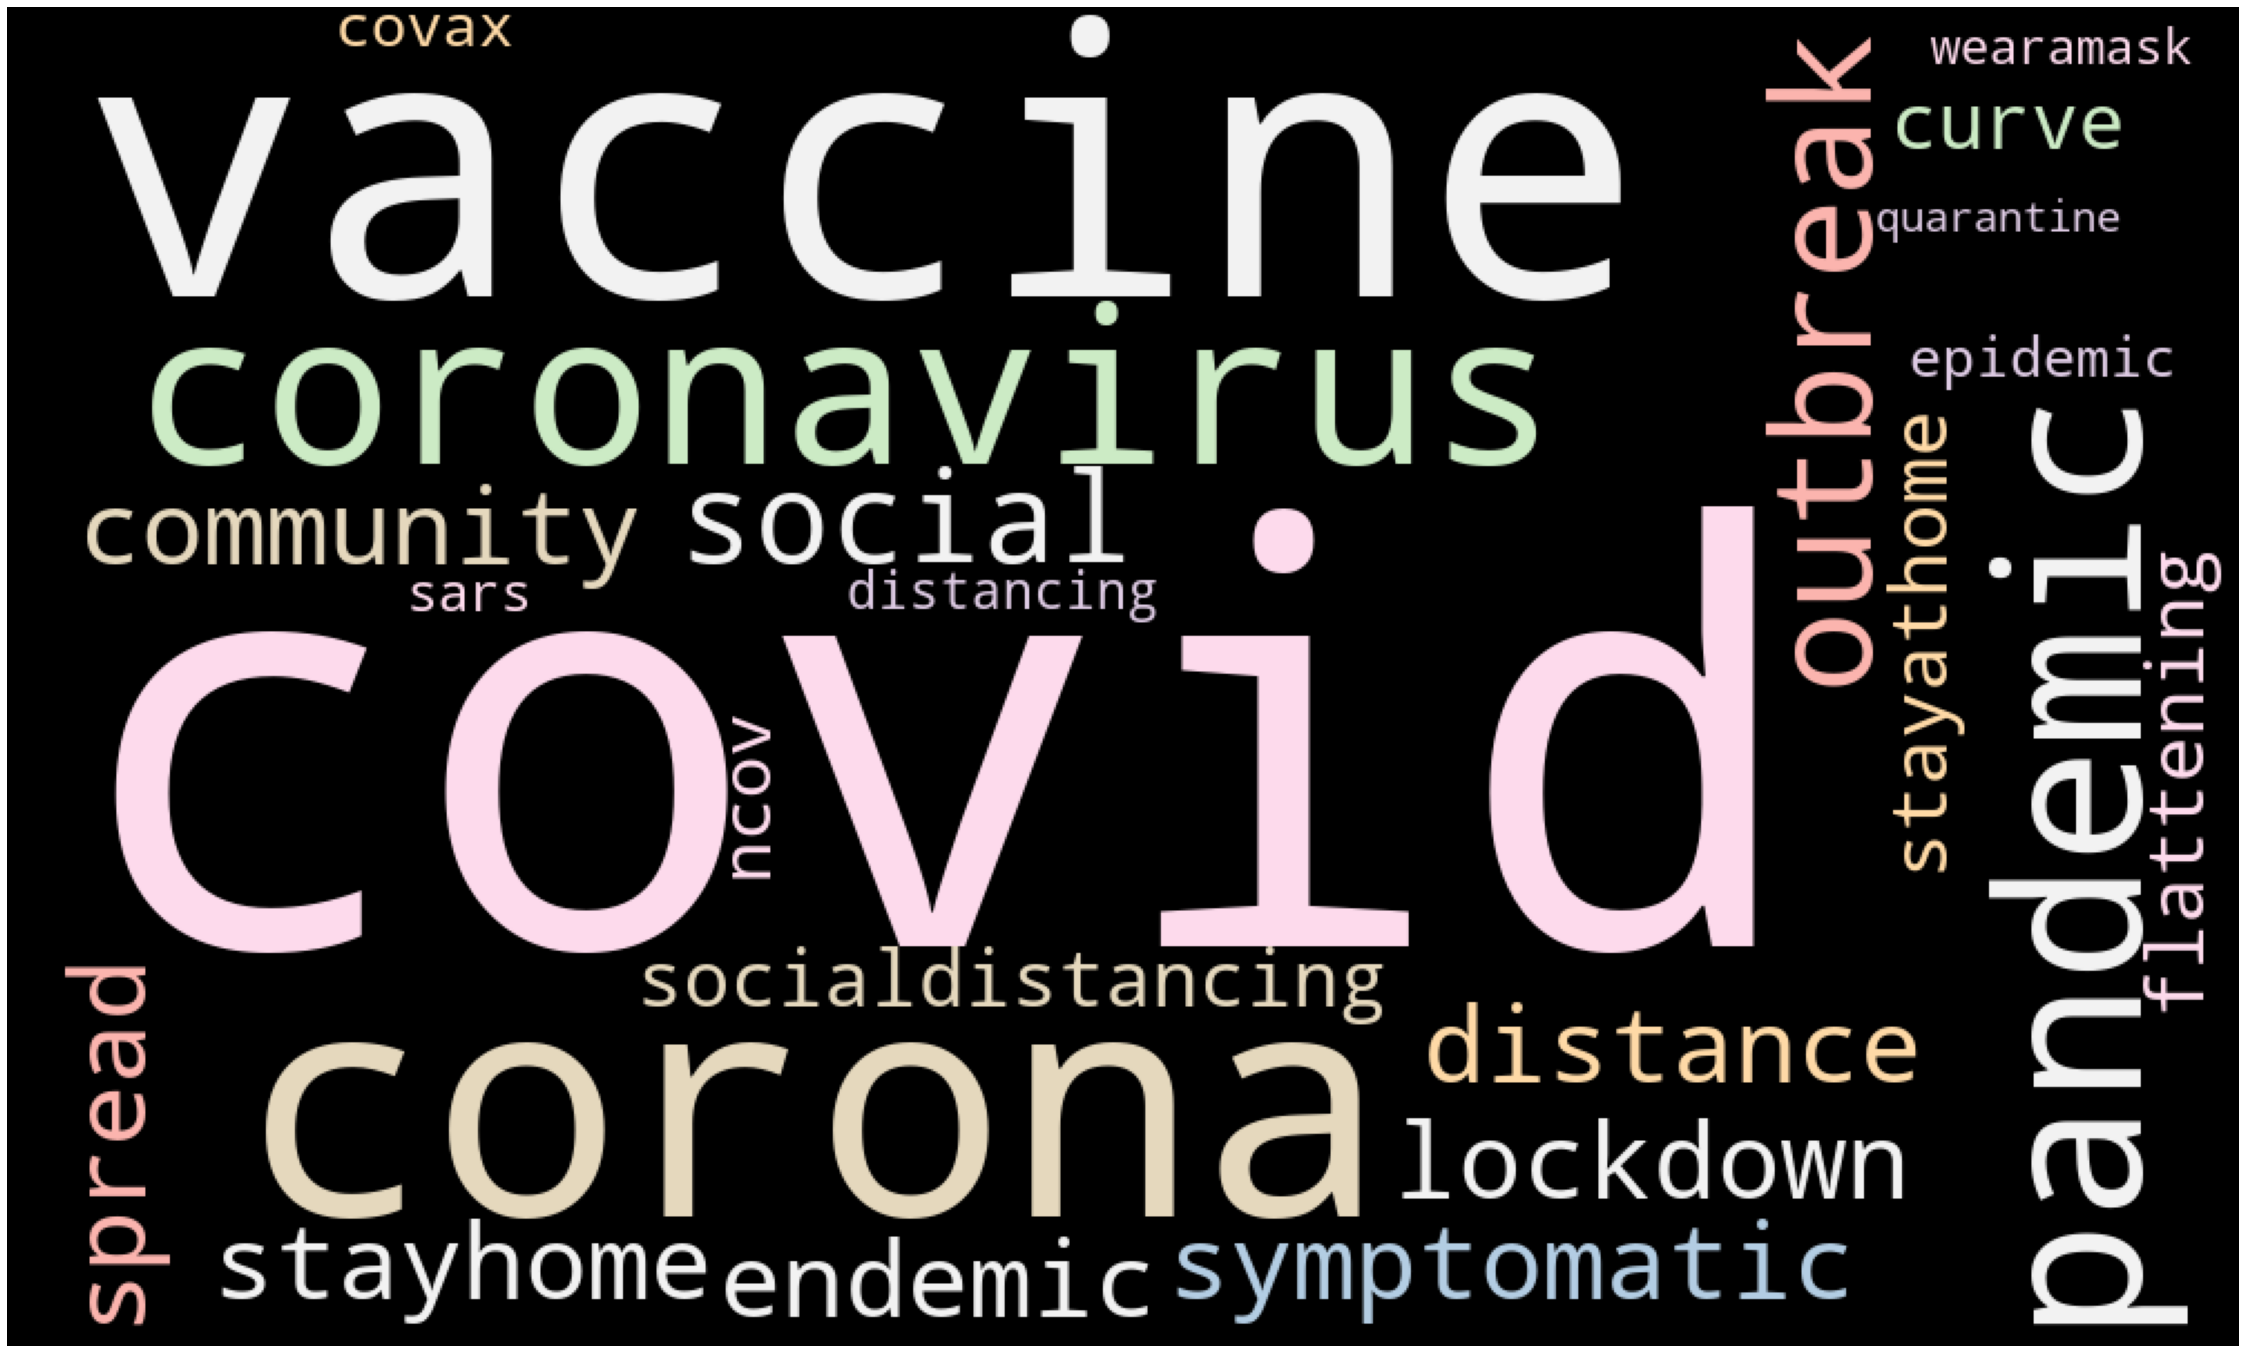

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 1000, height = 600, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(l)
# Plot
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.savefig("map")
plot_cloud(wordcloud)

